In [1]:
from IPython.display import HTML

input_form = """
<button onclick="toggle_src()">toggle source code</button>
"""

javascript = """
<script type="text/Javascript">
is_hidden = true;
function toggle_src_code() {
        
        var inputs = document.getElementsByClassName('input');
        for(i=0; i<inputs.length; i++) {
            if (is_hidden) {
                inputs[i].style.height = "0";
                inputs[i].style.opacity = "0";
            } else {
                inputs[i].style.height = "auto";
                inputs[i].style.opacity = "1";
            }
        }
    }
    
    setTimeout(toggle_src_code, 100);

    function toggle_src() {
        is_hidden = !is_hidden;
        toggle_src_code();
    }
    
</script>
"""

HTML(input_form + javascript)

# Fitting probability models
(Source: http://www.computervisionmodels.com/)

## Maximum likelihood

find set of parameters $\hat{\theta}$ under which the date $\{x_i\}_{i=1}^I$ are most likely.

To calculate likelihood function $ \ \Pr(x_i \ | \ \theta) \ $ at single data point $x_i$, simply evaluate pdf at $x_i$. Assuming each point is drawn independently from distribtion, likelihood function $\Pr(x_{1...I} | \theta)$ for a set of points is the product of the individual likelihoods. Hence, the ML estimate of the params is:

$$\hat{\theta} = \underset{\theta}{\mathrm{argmax}}[\Pr(x_{1...I} \ | \ \theta \ )] \\
= \underset{\theta}{\mathrm{argmax}} \biggr[
\prod_{i=1}^I \Pr(x_i | \theta)
\biggr]$$

**Evaluate**: $\Pr(x^* \ | \ \hat{\theta} \ )$

---
#### Example (univariate normal)

$$
\Pr(x \ | \ \mu, \sigma^2) = \mathrm{Norm}_x [\mu, \sigma^2] =
\frac{1}{\sqrt{2\pi \sigma^2}} exp \biggr[ 
-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}
\biggr]
$$

Likelihood of $\Pr(x_{1...I} | \mu, \sigma^2)$ of parameters $\{\mu, \sigma^2\}$ for observed data $\{x_i\}_{i=1}^I$ is computed by evaluating pdf for each data point separatly and taking the product:

$$
\Pr(x_{1...I} | \mu, \sigma^2) = \prod_{i=1}^I\Pr\big(x_i \ \big| \ \mu, \sigma^2\big)\\
= \prod_{i=1}^I \mathrm{Norm}\big[\mu, \sigma^2 \big]\\
= \frac{1}{(2\pi\sigma^2)^{\frac{I}{2}}} \mathrm{exp}\biggr[
-0.5 \sum_{i=1}^I \frac{(x_i - \mu)^2}{\sigma^2}
\biggr]
$$

The maximum likelihood solution $\hat{mu}, \hat{\sigma}^2$ will occur at the peek of the likelihood function over the parameter space so that:

$$\hat{\mu}, \hat{\sigma}^2 = \underset{\mu, \sigma^2}{\mathrm{argmax}} \big[ 
\Pr(x_{1...I} \big| \mu, \sigma^2)
\big]$$

Maximize this by derivating $\Pr(x_{1...I} \big | \ \mu, \sigma^2)$ with respect to $\mu$ and $\sigma^2$, equate to zero and solve it.

In **practice** this derivation is messy and so we instead take the **log likelihood** to simplify the calculations.

$$\\$$

$$\hat{\mu}, \hat{\sigma}^2 = \underset{\mu, \sigma^2}{argmax}\biggr[
\sum_{i=1}^I \log\big[ 
\mathrm{Norm}_x [\mu, \sigma^2]
\big]\biggr]\\
=\underset{\mu, \sigma^2}{argmax} \biggr[ 
-0.5 I \log[2\pi] - 0.5I\log \sigma^2 - 0.5 
\sum_{i=1}^I \frac{(x_i-\mu)^2}{\sigma^2}
\biggr]
$$

To maximize, differentiate *log likelihood* **L** with respect to $\mu$ and equate to zero

$$
\frac{\partial L}{\partial \mu} = \sum_{i=1}^I \frac{(x_i-\mu)}{\sigma^2}
= \frac{\sum_{i=1}^I x_i}{\sigma^2}- \frac{I\mu}{\sigma^2} = 0
$$

Rearrange:

$$\hat{\mu} = \frac{\sum_{i=1}^I x_i}{I}$$

$$\hat{\sigma}^2 = \sum_{i=1}^I \frac{(x_i-\hat{\mu})^2}{I}$$

/root/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/root/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


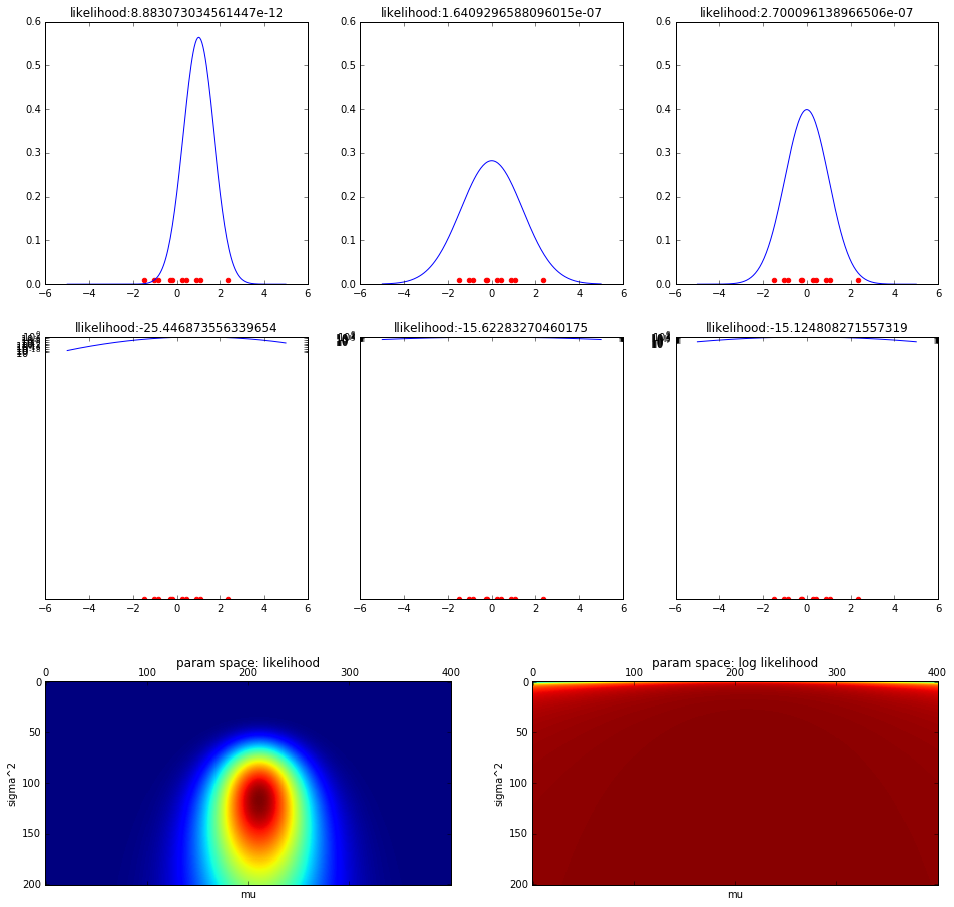

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

def norm(mu, sigma_sq):
    first_term = 1.0 / math.sqrt(2.0 * math.pi * sigma_sq)
    return lambda x: first_term * \
        math.exp(-0.5 * (((x-mu)**2)/sigma_sq))

def likelihood(X, pr):
    total = 1
    for x in X:
        total = pr(x) * total
    return total
    
# ==== np draw ====

samples = np.random.normal(0.0, 1, 10)

fig = plt.figure(figsize=(16,16))

# ==== plot ====
ax = fig.add_subplot(331)
mu, sigma_sq = 1, 0.5
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

ax.plot(np.array(X), np.array(Y))
ax.scatter(samples, [0.01] * len(samples), color='red')
ax.set_ylim([0, 0.6])

l = likelihood(samples, N)
ax.set_title("likelihood:" + str(l))

# ==
ay = fig.add_subplot(332)
mu, sigma_sq = 0, 2
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

ay.plot(np.array(X), np.array(Y))
ay.scatter(samples, [0.01] * len(samples), color='red')
ay.set_ylim([0, 0.6])

l = likelihood(samples, N)
ay.set_title("likelihood:" + str(l))

# ==
az = fig.add_subplot(333)
mu, sigma_sq = 0, 1
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

az.plot(np.array(X), np.array(Y))
az.scatter(samples, [0.01] * len(samples), color='red')
az.set_ylim([0, 0.6])

l = likelihood(samples, N)
az.set_title("likelihood:" + str(l))

# ==============================
# log likelihood
# ==============================

def log_likelihood(X, pr):
    total = 0
    for x in X:
        prob = pr(x)
        if (prob > 0):
            total = total + math.log(pr(x))
    return total

# ==== plot ====
ax = fig.add_subplot(334)
mu, sigma_sq = 1, 0.5
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

ax.plot(np.array(X), np.array(Y))
ax.scatter(samples, [0] * len(samples), color='red')
ax.set_ylim([0, 1])
ax.set_yscale("log", nonposy='clip')

l = log_likelihood(samples, N)
ax.set_title("llikelihood:" + str(l))

# ==
ay = fig.add_subplot(335)
mu, sigma_sq = 0, 2
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

ay.plot(np.array(X), np.array(Y))
ay.scatter(samples, [0] * len(samples), color='red')
ay.set_ylim([0, 1])
ay.set_yscale("log", nonposy='clip')

l = log_likelihood(samples, N)
ay.set_title("llikelihood:" + str(l))

# ==
az = fig.add_subplot(336)
mu, sigma_sq = 0, 1
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

az.plot(np.array(X), np.array(Y))
az.scatter(samples, [0] * len(samples), color='red')
az.set_ylim([0, 1])
az.set_yscale("log", nonposy='clip')

l = log_likelihood(samples, N)
az.set_title("llikelihood:" + str(l))

# ==============================
# parameter space
# ==============================

def param_space(X, fun, Pr_gen, Sigma_sq, Mu):
    I = np.zeros((len(Sigma_sq), len(Mu)))
    
    for y, sq in enumerate(Sigma_sq):
        for x, mu in enumerate(Mu):
            pr = Pr_gen(mu, sq)
            I[y,x] = fun(X, pr)
    
    return I

Sigma_sq = np.linspace(0.0001, 2, 201)
Mu = np.linspace(-2, 2, 401)

I = param_space(samples, likelihood, norm, Sigma_sq, Mu)

ax = fig.add_subplot(325)
ax.set_title("param space: likelihood")
ax.set_xlabel("mu")
ax.set_ylabel("sigma^2")
ax.matshow(I)

I = param_space(samples, log_likelihood, norm, Sigma_sq, Mu)
#I = I * (-1)
ax = fig.add_subplot(326)
ax.set_title("param space: log likelihood")
ax.set_xlabel("mu")
ax.set_ylabel("sigma^2")

ax.matshow(I)

plt.show()

## Maximum a posteriori

Introduce *prior* information about parameter $\theta$. From previous experience something about possible param values might be known..

$$
\hat{\theta} = \underset{\theta}{\mathrm{argmax}}\big[
\Pr(\theta \ \big | \ x_{1...I}) 
\big] \\
= \underset{\theta}{\mathrm{argmax}} \biggr[
\frac{\Pr(x_{1...I} \ \big | \ \theta)\Pr(\theta))}{\Pr(x_{1...I})}
\biggr] \\
= \underset{\theta}{\mathrm{argmax}}\biggr[
\frac{
\prod_{i=1}^I \Pr(x_i \ | \ \theta)\Pr(\theta)
}{
\Pr(x_{1...I})
}
\biggr]
$$

Bayes's rule, furthermore, denominator can be droped as it is constant w.r.t. $\theta$:

$$\hat{\theta} = \underset{\theta}{\mathrm{argmax}}\biggr[
\prod_{i=1}^I \Pr(x_i \ \big| \ \theta)\Pr(\theta)
\biggr]$$

**Evaluate**: $\Pr(x^* \ | \ \hat{\theta} \ )$

---

#### Example

$$\hat{\mu}, \hat{\sigma}^2 = \underset{\mu,\sigma^2}{\mathrm{argmax}} \biggr[
\prod_{i=1}^I \Pr(x_i \ \big| \ \mu, \sigma^2)\Pr(\mu, \sigma^2)
\biggr]\\
= \underset{\mu,\sigma^2}{\mathrm{argmax}}\biggr[
\prod_{i=1}^I\mathrm{Norm}_{x_i} \big[\mu, \sigma^2 \big]
\mathrm{NormInvGam}_{\mu, \sigma^2}\big[\alpha,\beta,\gamma,\delta\big]
\biggr]$$

expression for prior:

$$\Pr(\mu, \sigma^2) = \frac{\sqrt{\gamma}}{\sigma \sqrt{2\pi}}
\frac{\beta^{\alpha}}{\Gamma(\alpha)}
\big(\frac{1}{\sigma^2}\big)^{\alpha+1} \mathrm{exp}\biggr[
- \frac{2\beta + \gamma(\delta-\mu)^2}{2\sigma^2}
\biggr]$$

$$\\$$

Like in **ML**, it is easier to maximize the **logarithm**:

$$\hat{mu},\hat{\sigma}^2 = \underset{\mu,\sigma^2}{\mathrm{argmax}}
\biggr[
\sum_{i=1}^I \log\big[ \mathrm{Norm}_{x_i}[\mu,\sigma^2] \big] +
\log \big[
\mathrm{NormInvGam}_{\mu,\sigma^2}[\alpha,\beta,\gamma,\delta]
\big]\biggr]$$

Substitute, differentiate w.r.t. $\mu$ and $\sigma^2$, equate to zero, rearange:

$$\hat{\mu}=\frac{
\sum_{i=1}^I x_i + \gamma\delta
}{I+\gamma} = \frac{I \overline{x} + \gamma \delta}{I+\gamma}$$

$$\hat{\sigma}^2=\frac{
\sum_{i=1}^I (x_i - \hat{mu})^2 + 2\beta + \gamma (\delta - \hat{\mu})^2
}{
I+3+2\alpha
}$$

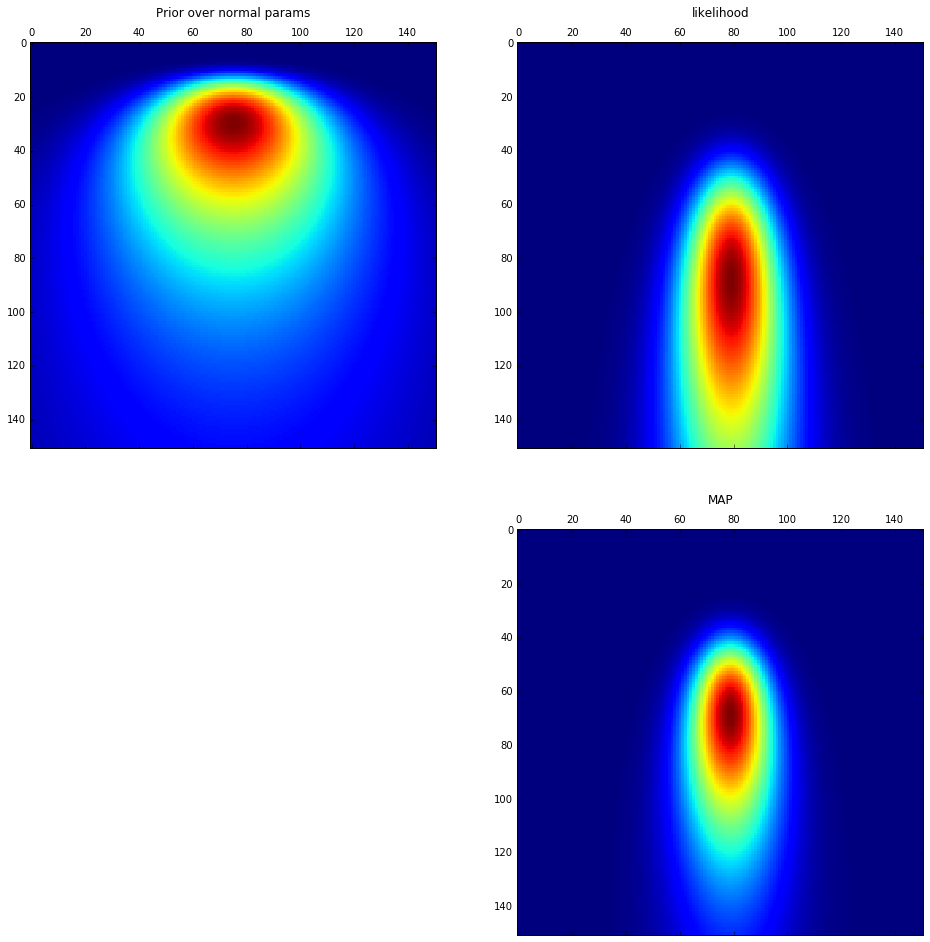

In [3]:
def generate_norm_inv_gam(a,b,c,d):
    def norm_inv_gam(mu, sigma_sq):
        term1 = math.sqrt(c) / math.sqrt(sigma_sq) * \
            math.sqrt(2.0 * math.pi)
        term2 = (b**a)/ math.factorial(a-1)
        term3 = (1.0/sigma_sq)**(a+1)
        term4 = math.exp(- (2 * b + c * (d - mu)**2)/ (2*sigma_sq))
        return term1 * term2 * term3 * term4
        
    return norm_inv_gam

fig = plt.figure(figsize=(16,16))

norm_inv_gam = generate_norm_inv_gam(1,1,1,0)

norm_inv_gam(0, 1)

# ===============================
# normal inv gamma
# ===============================

ax = fig.add_subplot(221)

Sigma_sq = np.linspace(0.0001, 2, 151)
Mu = np.linspace(-2, 2, 151)

P = np.zeros((len(Sigma_sq), len(Mu)))
    
for y, sq in enumerate(Sigma_sq):
    for x, mu in enumerate(Mu):
        pr = norm_inv_gam(mu, sq)
        P[y,x] = pr

        
ax.matshow(P)
ax.set_title("Prior over normal params")

# ===============================
# likelihood function
# ===============================
ax = fig.add_subplot(222)
L = param_space(samples, likelihood, norm, Sigma_sq, Mu)
ax.matshow(L)
ax.set_title("likelihood")

# ===============================
# likelihood * prior
# ===============================
ax = fig.add_subplot(224)

MAP = P * L
ax.matshow(MAP)
ax.set_title("MAP")

plt.show()

## Baysian

Stop try to estimate single fixed point values for $\theta$ but instead compute probability distribution $\Pr(\theta \ \vert \ x_{1...I})$ over $\theta$ based on data $\{x_i\}_{i=1}^I$

$$\Pr(\theta \ \vert \ x_{1...I} = \frac{
\prod_{i=1}^I \Pr(x_i \ \vert \ \theta)\Pr(\theta)
}{
\Pr(x_{1...I})
}$$

**Evaluation**: More difficult, as we only have a probability distribution over possible models:

$$\Pr(x^* \ \vert \ x_{1...I}) = \int \Pr(x^* \ \vert \ \theta)\Pr(\theta \ \vert \ x_{1...I})d\theta$$

---



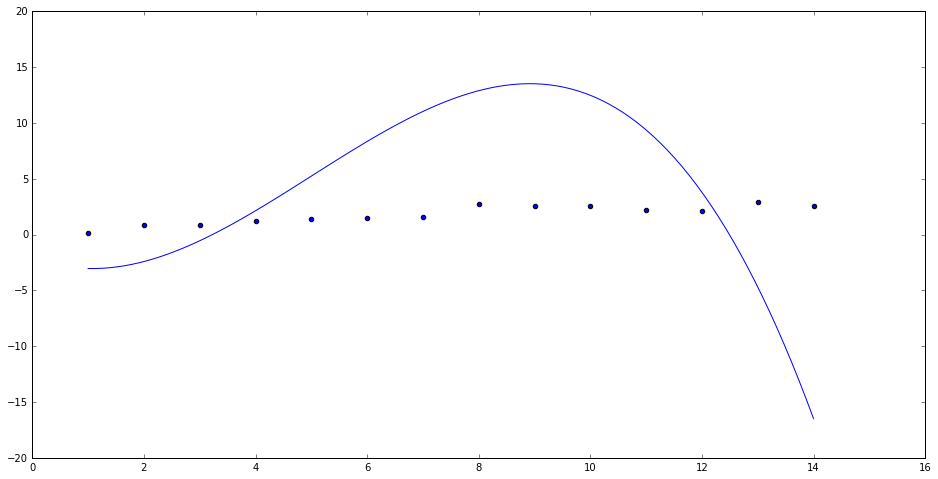

In [10]:
fig = plt.figure(figsize=(16,8))

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
T = [0.1, 0.9, 0.9, 1.2, 1.4, 1.5, 1.55,
     2.7, 2.6, 2.6, 2.2, 2.1, 2.9, 2.6]

def y(x,w):
    total = 0
    M = len(w)
    for j, w in enumerate(w):
        total += (w * (x ** j))
    return total

def E(w, X, T, y):
    assert(len(X) == len(T))
    total = 0
    for n, x in enumerate(X):
        t = T[n]
        sq = (y(x, w) - t) ** 2
        total += sq
    return 0.5 * total

w = [0, -0.1, -0.1, 0]


def plot_w(ax, w, X, fun=y):
    min_v = min(X)
    max_v = max(X)
    X = np.linspace(min_v, max_v, 100)
    Y = [fun(x, w) for x in X]
    ax.plot(X,Y)
    
def brute_force_fitting(ax, w, X, T, fun=y, Err=E):
    best_params = list(w)
    best_error = Err(w,X,T, fun)
    
    values = np.linspace(-2, 2, 30)
    
    assert(len(w) == 4)
    for a in list(values):
        for b in list(values):
            for c in list(values):
                for d in list(values):
                    w = [a, b, c, d]
                    error = Err(w,X,T, fun)
                    w_ = np.array(w)
                    error += w_.T @ w_
                    if error < best_error:
                        best_params = list(w)
                        best_error = error
                    
    plot_w(ax, best_params, X, fun)
            

ax = fig.add_subplot(111)
ax.scatter(X,T)


brute_force_fitting(ax, w, X, T, y, E)

plt.show()